<font size="+2" color="brown"><i><b><center>"There is no way to peace.Peace is the way"</center></b></i></font>

<font size="+3" color=purple><u><center>US Police Fatal Shooting Analysis</center></u></font>

![](https://media.tenor.com/images/97410e09204b993b8a6c003739f6d277/tenor.gif)
source:media.tenor

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of content</h3>

* [Introduction](#intro)
* [Data](#data)
* [1. Monthly death report : 2015-2020](#1)
* [2. Monthly death report every year](#2)
* [3. Most Death recorded Months](#3)
* [4. Most Death recorded Years](#4)
* [5. Most Death recorded Day](#5)
* [6. Gender proportion](#6)
* [7. Most affected Age group](#7)
* [8. Most affected Race](#8)
* [9. Most suffered State](#9)
* [10. Most suffered City](#10)
* [11. Flee or not?](#11)
* [12. Armed or not?](#12)
* [13. Mentall Illness?](#13)
* [14. Black peoples suffered](#14)
* [15. All race victims in US](#15)
* [16. Relation between Age and Race](#16) 
* [17. Black Lives Matter Tweet](#17)

<a id="intro"></a>
<font size="+2" color="blue"><b>Introduction</b></font><br>

<font color="green"><i>No religion can be greater than Humanity</i></font>.We are facing a tough world with less humanity now.Yes,I am going to talk about police violence in United States.Already we are fighting to overcome the invisible pandemic microbe.In addition to this,we are protesting for our black race people rights..After all I just want to say - *World is for all humans.There is nothing peculiar for one*

In this kernel,I have done EDA on US cops violence against people between 2015 and 2020.I have utilized the [JohnM dataset](https://www.kaggle.com/jpmiller/police-violence-in-the-us).This kernel will not only speak about black race people infact against all races living in Americas.The brutall killing on criminals and innocents has widely increased throught out the country.I have tried to bring more insights from the data.

I hope you will enjoy my kernel and at the same time you will realize how serious is the issue across each race people for past 5 years.I will be doing more research here.So keep this kernel in your favourite list by upvoting it.

<a id="data"></a>
<font size="+2" color="blue"><b>Data & Libraries</b></font><br>

In [1]:
import numpy as np 
import pandas as pd
import os
import datetime
import re
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings("ignore")

In [2]:
shoot=pd.read_csv('/kaggle/input/police-violence-in-the-us/shootings_wash_post.csv')
tweet=pd.read_csv('../input/black-lives-matter-twitter-dataset/data.csv')
# Feature Generation
shoot['date']=pd.to_datetime(shoot['date'])
shoot['year']=pd.to_datetime(shoot['date']).dt.year
shoot['month']=pd.to_datetime(shoot['date']).dt.month
shoot['month_name']=shoot['date'].dt.strftime('%B')
shoot['month_num']=shoot['date'].dt.strftime('%m')
shoot['weekdays']=shoot['date'].dt.strftime('%A')  
shoot['date_num']=shoot['date'].dt.strftime('%d').astype(int)
shoot['date_categ']=np.where(shoot['date_num']<16,"First Half","Second Half")
shoot['date_mon']=shoot.date.dt.to_period("M")

shoot['age_freq']=np.where(shoot['age']<18,'<18',np.where((shoot['age']>17)&(shoot['age']<=30),'18-30',
np.where((shoot['age']>30)&(shoot['age']<=40),'31-40',np.where(shoot['age']>50,'50+',
np.where((shoot['age']>40)&(shoot['age']<=50),'41-50',"Not Specified")))))

shoot['race_name']=np.where(shoot['race']=='W','White',np.where(shoot['race']=='B','Black',
np.where(shoot['race']=='N','Native American',np.where(shoot['race']=='H','Hispanic',
np.where(shoot['race']=='A','Asian',np.where(shoot['race']=='O','Others','Not Specified'))))))

In [3]:
shoot.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,year,month,month_name,month_num,weekdays,date_num,date_categ,date_mon,age_freq,race_name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,2015,1,January,01,Friday,2,First Half,2015-01,50+,Asian
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,2015,1,January,01,Friday,2,First Half,2015-01,41-50,White
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,2015,1,January,01,Saturday,3,First Half,2015-01,18-30,Hispanic


<a id="1"></a>
<font size="+2" color="indigo"><b>1. Monthly death report : 2015-2020 </b></font><br>

In [4]:
monthly_df=shoot['date'].groupby(shoot.date.dt.to_period("M")).agg('count').to_frame(name="count").reset_index()
month_year=[]
for i in monthly_df['date']:
    month_year.append(str(i))

In [5]:
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Monthly series", "Distribution of monthly count"))

fig.add_trace(go.Scatter(
    x= month_year,
    y= monthly_df['count'],
    name="Monthly Deaths",
    mode='lines',
),row=1,col=1)

fig.add_trace(go.Box(y=monthly_df['count'], name='Count',
                marker_color = 'indianred',boxmean='sd'),row=2,col=1
)
fig.update_xaxes(title_text="Year", row=1, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_xaxes(title_text=" ", row=2, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Victims", row=1, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text="Number of Victims", row=2, col=1,showline=True, linewidth=2, linecolor='black', mirror=True)

fig.update_layout(title_text='Fatal Killing Monthly Count 2015 - 2020', title_x=0.5,showlegend=False,height=1000)
fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>

* We see the fluctuations on an average around **80 deaths per month**.
* **Mean and median are very close to each other**.This proves that the number of deaths per month is distributed uniformly around 80.It shows unimodal peak.
* The 25% and 75% interquartile reveals the number of kills are between **76 and 89** respectively.
* **September 2018** has recorded the lowest number of deaths.I digged into news articles and found there were San Bernardino Apartment and police were alerted throught United states.[Events from Sep 2018](https://www.infoplease.com/september-2018-current-events-us-news)
* **March 2018** has recorded **109** number of deaths.I could see read from articles that there were numerous shooting incidents even from school.[Events from March 2018](https://www.infoplease.com/march-2018-current-events-us-news)
* Even during the spread of COVID,there is no much control on shooting people. 
* Also we can observe **109 deaths in May 2020**.This number might be because of demise of George Floyd and following protest.

<a id="2"></a>
<font size="+2" color="indigo"><b>2. Monthly death report every year</b></font><br>

In [6]:
monthly_df['year']=monthly_df['date'].dt.strftime('%Y') 
def plot_month(year,color):
    temp_month=[]
    for i in monthly_df.loc[monthly_df['year']==year]['date']:
        temp_month.append(str(i))
    trace=go.Bar(x=temp_month, y=monthly_df.loc[monthly_df['year']==year]['count'],
           name=year,marker_color=color)
    return trace

In [7]:
fig = make_subplots(rows=3, cols=2,subplot_titles=("2015", "2016","2017","2018","2019","2020"))
fig.add_trace(plot_month('2015','red'),row=1,col=1)
fig.add_trace(plot_month('2016','blue'),row=1,col=2)
fig.add_trace(plot_month('2017','green'),row=2,col=1)
fig.add_trace(plot_month('2018','orange'),row=2,col=2)
fig.add_trace(plot_month('2019','indigo'),row=3,col=1)
fig.add_trace(plot_month('2020','violet'),row=3,col=2)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Deaths Every Year', title_x=0.5,showlegend=False)
fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>

* We can observe the pattern.There are some high peaks in **summer** every year.
* **First 2-3 months of every year** has highest number of victims.

<a id="3"></a> 
 <font size="+2" color="indigo"><b>3. Most Death recorded Months</b></font><br>

In [8]:
only_month=shoot.groupby(['month_name','date_categ'])['id'].agg('count').reset_index().rename(columns={'id':'count'})
only_month['month_name'] = pd.Categorical(only_month['month_name'],categories=['January','February','March','April','May','June','July','August','September','October','November','December'],ordered=True)
only_month = only_month.sort_values('month_name')

In [9]:
fig = go.Figure(data=[
    go.Bar(name='First Half', x=only_month[only_month['date_categ']=='First Half']['month_name'], y=only_month[only_month['date_categ']=='First Half']['count']),
    go.Bar(name='Second Half', x=only_month[only_month['date_categ']=='Second Half']['month_name'], y=only_month[only_month['date_categ']=='Second Half']['count'])
])

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Deaths - All Months',xaxis_title='Months',
                 yaxis_title='Total number of kills', title_x=0.5,barmode='stack')

fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>

* As we observed from previous graph,**january,february and march** have recorded most cases.
* The second half of year is **low comparitive** to the first half.

<a id="4"></a>
<font size="+2" color="indigo"><b>4. Most Death recorded Years</b></font><br>

In [10]:
year_shoot=shoot['year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year':'count'}).sort_values(by="year")

In [11]:
fig = go.Figure(data=go.Scatter(
    x= year_shoot['year'],
    y= year_shoot['count'],
    mode='lines+markers',
    marker_color="red"
))
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Deaths - All Years',xaxis_title='Years',
                 yaxis_title='Total number of kills', title_x=0.5)

fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>

* This graph shows that the rate of killing per year has **never looked down except 2016**.
* It has an average of 983 per year.**Almost 1000 people are killed every year**.This is so sad to hear.
* We are in mid of 2020 and we have already reached **432** death counts as of now.Will this year also be the same story as before?

<a id="5"></a>
<font size="+2" color="indigo"><b>5. Most Death Recorded Day</b></font><br>

In [12]:
weekdays_df=shoot['weekdays'].value_counts().reset_index().rename(columns={'index':'weekdays','weekdays':'count'})
weekdays_df['weekdays'] = pd.Categorical(weekdays_df['weekdays'],categories=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],ordered=True)
weekdays_df = weekdays_df.sort_values('weekdays')

In [13]:
fig = ff.create_table(weekdays_df, height_constant=60)
fig.add_trace(go.Scatter(
    x= weekdays_df['weekdays'], 
    y= weekdays_df['count'], 
    xaxis='x2', yaxis='y2',
    mode="markers",marker_size=12
))

fig.update_layout(
    title_text = 'Weekdays Death Report',
    title_x=0.5,
    margin = {'t':50, 'b':100},
    xaxis = {'domain': [0, .5]},
    xaxis2 = {'domain': [0.6, 1.]},
    yaxis2 = {'anchor': 'x2', 'title': 'Count'}
)

fig.show()


<font size="+1" color="green"><b>Observation:</b></font><br>

* Most people are shot around **mid** of weekdays
* Weekends proportion to weekdays are relatively smaller.

<a id="6"></a>
<font size="+2" color="indigo"><b>6. Gender proportion</b></font><br>

In [14]:
shoot_gender=shoot.groupby(['year','gender']).agg('count')['id'].to_frame(name='count').reset_index()
shoot_gender_male=shoot_gender.loc[shoot_gender['gender']=='M']
shoot_gender_female=shoot_gender.loc[shoot_gender['gender']=='F']

In [15]:
male=go.Bar(x=shoot_gender_male['year'],y=shoot_gender_male['count'],marker=dict(color='brown'),name="male")
female=go.Bar(x=shoot_gender_female['year'],y=shoot_gender_female['count'],marker=dict(color='orange'),name="female")
data=[male,female]

fig = go.Figure(data)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title="Death Toll - Gender",title_x=0.5,xaxis=dict(title="Year"),yaxis=dict(title="Number of Victims"),
                   barmode="group")
fig.show()

In [16]:
print("Gender proportion F:M - 1:{}".format(round(shoot_gender_male['count'].mean()/shoot_gender_female['count'].mean())))

Gender proportion F:M - 1:22


<font size="+1" color="green"><b>Observation:</b></font><br>
* F:M ratio of being killed is **1 Female for every 22 Males**.This is expected fact that females commit less crimes comparative to males.

<a id="7"></a>
<font size="+2" color="indigo"><b>7. Most affected Age group</b></font><br>

In [17]:
hist_data = [shoot['age'].dropna()]
group_labels = ['Age'] 
colors=["blue"]
fig=go.Figure()
fig=ff.create_distplot(hist_data, group_labels,bin_size=5,colors=colors)
fig.update_layout(title_text="Distribution of Age",title_x=0.5)
fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>
* Most affected people are around age between **20-40**.
* The graph is **right skewed** which tells us that more elder are being killed.

<a id="8"></a>
<font size="+2" color="indigo"><b>8. Most affected Race</b></font><br>

In [18]:
shoot_race=shoot.groupby(['year','month_num','race_name']).agg('count')['id'].to_frame(name='count').reset_index()
shoot_race['monthly']=shoot_race['year'].astype(str)+"-"+shoot_race['month_num'].astype(str)

In [19]:
def plot_month_race(race,color):
    temp_month=[]
    for i in shoot_race.loc[(shoot_race['race_name']==race)]['monthly']:
        temp_month.append(str(i))
    trace=go.Bar(x=temp_month, y= shoot_race.loc[(shoot_race['race_name']==race)]['count'],
           name=race,marker_color=color)
    return trace

In [20]:
fig = make_subplots(rows=3, cols=2,subplot_titles=("Black", "White","Hispanic","Asian","Native American","Others"))
fig.add_trace(plot_month_race('Black','brown'),row=1,col=1)
fig.add_trace(plot_month_race('White','deepskyblue'),row=1,col=2)
fig.add_trace(plot_month_race('Hispanic','green'),row=2,col=1)
fig.add_trace(plot_month_race('Asian','red'),row=2,col=2)
fig.add_trace(plot_month_race('Native American','orange'),row=3,col=1)
fig.add_trace(plot_month_race('Others','violet'),row=3,col=2)
fig.update_layout(title_text='Deaths - All Race',title_x=0.5)

fig.show()

In [21]:
fig = go.Figure()
fig.add_trace(go.Box(y=shoot_race.loc[(shoot_race['race_name']=="Black")]['count'], name='Black',
                marker_color = 'brown',boxmean=True))
fig.add_trace(go.Box(y=shoot_race.loc[(shoot_race['race_name']=="White")]['count'], name = 'White',
                marker_color = 'grey',boxmean=True ))
fig.add_trace(go.Box(y=shoot_race.loc[(shoot_race['race_name']=="Hispanic")]['count'], name = 'Hispanic',
                marker_color = 'green',boxmean=True ))
fig.add_trace(go.Box(y=shoot_race.loc[(shoot_race['race_name']=="Asian")]['count'], name = 'Asian',
                marker_color = 'red',boxmean=True ))
fig.add_trace(go.Box(y=shoot_race.loc[(shoot_race['race_name']=="Native American")]['count'], name = 'Native American',
                marker_color = 'orange',boxmean=True ))
fig.add_trace(go.Box(y=shoot_race.loc[(shoot_race['race_name']=="Others")]['count'], name = 'Others',
                marker_color = 'violet',boxmean=True ))


fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title="Death Toll - All Races",title_x=0.5,xaxis=dict(title="Race"),yaxis=dict(title="Number of Victims"))

fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>

* We could see more of white race and black people are affected.**Immigrants are facing more deaths**.
* Monthly average death of **white peoples are 36** and **black peoples are 19**.
* White people are the most suffered.
* Hispanic are the next to black and white people with average around 15

<a id="9"></a>
<font size="+2" color="indigo"><b>9. Most suffered State</b></font><br>

In [22]:
shoot_state=shoot['state'].value_counts().to_frame().reset_index().rename(columns={'index':'state','state':'count'}).sort_values(by='count',ascending=False)
shoot_state.head(5)

,state,count
0,CA,820
1,TX,491
2,FL,366
3,AZ,257
4,CO,204


In [23]:
fig = go.Figure(go.Bar(
    y= shoot_state['state'].sort_index(ascending=False), 
    x= shoot_state['count'].sort_index(ascending=False),  
     orientation='h',
      text=shoot_state['count'].sort_index(ascending=False),
    textposition='outside',
    marker_color=shoot_state['count'].sort_index(ascending=False),
))
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Fatal Killing - All States',yaxis_title='States',
                 xaxis_title='Total number of victims', title_x=0.5,height=1000)
fig.show()


In [24]:
print("Average number of victims per state is {}".format(round(shoot_state['count'].mean())))

Average number of victims per state is 109


<font size="+1" color="green"><b>Observation:</b></font><br>

* **California** has recorded most number of victims.
* **Texas and Florida** are next to California. These three are densely populated states in US.
* Average number of victims per state is **106**
* Densely populated state are the most victim faced state.

<a id="10"></a>
<font size="+2" color="indigo"><b>10. Most suffered City</b></font><br>

In [25]:
shoot_city=shoot['city'].value_counts().to_frame().reset_index().rename(columns={'index':'city','city':'count'}).sort_values(by='count',ascending=False)

In [26]:
fig = go.Figure(go.Bar(
    x= shoot_city['city'][:20], 
    y= shoot_city['count'][:20],  
    text=shoot_state['count'][:20],
    textposition='outside',
    marker_color=shoot_state['count'][:20]
))

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Fatal Killing - Top 20 Cities',xaxis_title='Cities',
                 yaxis_title='Total number of kills', title_x=0.5)

fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>

* **Los Angeles,Phoenix and Houston** have recorded most victims.

<a id="11"></a>
<font size="+2" color="indigo"><b>11. Flee or not?</b></font><br>

In [27]:
arm_df=shoot['flee'].value_counts().reset_index().rename(columns={'index':'flee','flee':'count'})
arm_df

,flee,count
0,Not fleeing,3489
1,Car,917
2,Foot,710
3,Other,174


In [28]:
fig = go.Figure(data=[go.Pie(labels=arm_df['flee'], values=arm_df['count'], hole=.3,textinfo='label+percent',
                             insidetextorientation='radial')])
fig.update_layout(title_text='Victim Flee?', title_x=0.5)
fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>

* **66%** of victimes didnot try to flee yet they were killed.This is completelt an unexpected scenario.
* Only 17.5 of people tried to flee by car and 13.3% tried to flee by foot.

<a id="12"></a>
<font size="+2" color="indigo"><b>12. Armed or not?</b></font><br>

In [29]:
armed=list(shoot['armed'].dropna().unique())
print("Total Number of Unique Arms Used: {} ".format(len(armed)))

Total Number of Unique Arms Used: 94 


Text(0.5, 1.0, 'Most Used Arms')

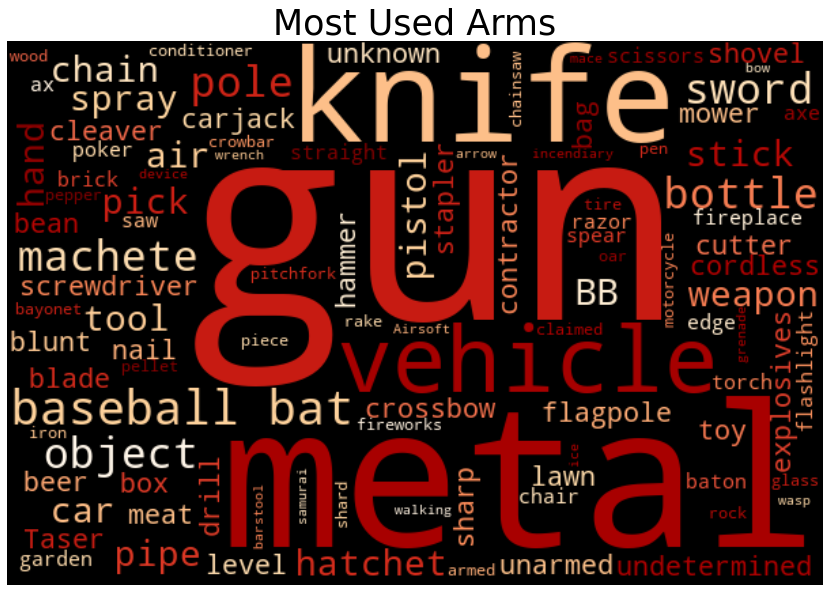

In [30]:
fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud(background_color='black',colormap="OrRd_r", 
                        width=600,height=400).generate(" ".join(armed))
ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Arms',fontsize=35)

<font size="+1" color="green"><b>Observation:</b></font><br>

* Most of victims had **gun,knife and metal** at time of incident.

 <a id="13"></a>
<font size="+2" color="indigo"><b>13. Mental illness?</b></font><br>

In [31]:
mental_ill=shoot['signs_of_mental_illness'].value_counts().to_frame().reset_index().rename(columns={'index':'mental_illness','signs_of_mental_illness':'count'})
mental_ill['mental_illness']=np.where(mental_ill['mental_illness']==True,"Mental Illness","No Mental Illness")

In [32]:
colors=['green','red']
fig = go.Figure(data=[go.Pie(labels=mental_ill['mental_illness'], values=mental_ill['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='percent+label', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Mental Illness?', title_x=0.5)
fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>

* Most of victims had no mentall issues.
* Another sad part,**almost 23%** of people with mental health were killed.

 <a id="14"></a>
<font size="+2" color="indigo"><b>14. Black peoples suffered</b></font><br>

In [33]:
black_state=shoot[shoot['race']=='B']['state'].value_counts().to_frame().reset_index().rename(columns={'index':'state','state':'count'})
black_year=shoot[shoot['race']=='B']['year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year':'count'})

In [34]:
fig = make_subplots(
    rows=2, cols=2, subplot_titles=("Black People victims in each states", "Yearly Black Victims", "Distribution of Black people Age",),
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6],
    specs=[[{"type": "Choropleth", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "histogram"}]])

fig.add_trace(go.Choropleth(
    locations=black_state['state'],
    z=black_state['count'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=black_state['state'], 
    marker_line_color='white', 
    colorbar_title="Millions USD",showscale = False,
),row=1, col=1)

fig.add_trace(go.Bar(
    x= black_year['year'],
    y= black_year['count'],  
    text=black_year['count'],
            textposition='inside',
    marker_color="chocolate",
    name="Death by year"
),row=1, col=2)

fig.add_trace(go.Histogram(x=shoot[shoot['race']=='B']["age"],nbinsx=10,marker_color='brown',name="Age Distribution",xbins=dict(size=10),
    opacity=1),row=2, col=2)

fig.update_layout(
    title_text='US Police Killing Black Peoples (2015-2020)',
    title_x=0.5,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.update_layout(
    template="plotly_dark",showlegend=False)
fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>

* As observed in previous state chart, **California,Texas and Florida** has recorded most black people deaths.
* There are more  darker side on **East side of US** too.
* Around **220-260**,black people are victims every year.
* There are **161 black minors** who have been victims so far from last 5 years.This is really sad.
* There are **no cases in few states of Northern America**.
* Most of 20-40 aged people were victims.

<a id="15"></a>
<font size="+2" color="indigo"><b>15. All race victims in US</b></font><br>

In [35]:
only_race=shoot[shoot['race_name']!="Not Specified"]['race_name'].value_counts().to_frame().reset_index().rename(columns={'index':'race_name','race_name':'count'})

In [36]:
fig = make_subplots(
    rows=2, cols=2, subplot_titles=("Victims in all states", "Victims by Year", "Victims by Race",),
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6],
    specs=[[{"type": "Choropleth", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "pie"}]])

fig.add_trace(go.Choropleth(
    locations=shoot_state['state'],
    z=shoot_state['count'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=shoot_state['state'], 
    marker_line_color='white', 
    colorbar_title="Millions USD",showscale = False,
),row=1, col=1)

fig.add_trace(go.Bar(
    x= year_shoot['year'], 
    y= year_shoot['count'], 
    text=year_shoot['count'],
            textposition='inside',
    marker_color="chocolate",
    name="Death by year"
),row=1, col=2)
fig.add_trace(go.Pie(labels=only_race['race_name'], values=only_race['count'],textinfo='percent',
                             insidetextorientation='radial'),row=2, col=2)


fig.update_layout(
    title_text='US Police Killing All Race (2015-2020)',
    title_x=0.5,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)
fig.update_layout(
    template="plotly_dark")
fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>

* Most of **southern and eastern** part of US were affected for all race people.
* This map highlights the three densely populated countries with more victims.
* **50%** of White people and **26.4%** of Black people are affected.

<a id="16"></a>
<font size="+2" color="indigo"><b>16. Relation between Age and Race </b></font><br>

In [37]:
race_age=shoot.loc[(shoot['race_name']!="Not Specified")&(shoot['age_freq']!="Not Specified")][['race_name','age_freq','id']]
temp_df=race_age.groupby(by=['age_freq','race_name']).agg('count').reset_index()
pivot_df=temp_df.pivot(index="age_freq",columns="race_name")
flattened = pd.DataFrame(pivot_df.to_records()).rename(columns={"age_freq":"Age","('id', 'Asian')":'Asian',"('id', 'Black')":"Black","('id', 'Hispanic')":"Hispanic",
                                                               "('id', 'Native American')":"Native","('id', 'Others')":"Others","('id', 'White')":"White"})


flattened['Total_Race'] = flattened.sum(axis=1)
flattened = flattened.append(flattened.agg(['sum']))

In [38]:
race_month=shoot.groupby(['race_name','date_mon'])['id'].agg('count').reset_index().rename(columns={'id':'count'})
def plot_race(race,color):
    temp_month=[]
    for i in race_month.loc[race_month['race_name']==race]['date_mon']:
        temp_month.append(str(i))   
    trace=go.Scatter(
        x= temp_month, 
        y= race_month[race_month['race_name']==race]['count'],name=race,
       line = dict(color=color, width=4, dash='dot'))
    return trace

In [39]:
fig=go.Figure()
fig.add_trace(plot_race('Black','brown'))
fig.add_trace(plot_race('White','deepskyblue'))
fig.add_trace(plot_race('Hispanic','green'))
fig.add_trace(plot_race('Asian','red'))
fig.add_trace(plot_race('Native American','orange'))
fig.add_trace(plot_race('Others','violet'))
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Monthly Death By Race',yaxis_title='Number of Deaths',
                 xaxis_title='Total number of deaths by Race', title_x=0.5)
fig.show()

In [40]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(flattened.columns),
               
                fill_color= ['blue','red','brown','green','orange','violet','deepskyblue','blue'],line_color='black',
                align='left',font=dict(color='white', size=15)),
    cells=dict(values=[flattened.Age,flattened.Asian,flattened.Black,flattened.Hispanic,flattened.Native,flattened.Others,flattened.White,flattened.Total_Race],
               fill_color='lightsteelblue',line_color='black',font=dict(color='black', size=13),
               align='left'))
])

fig.update_layout(title_text='Pivot Table - Age vs Race', title_x=0.5)
fig.show()

<font size="+1" color="green"><b>Observation:</b></font><br>

* **White and Black** peoples are the most affected ones.
* **Hispanic victims** are lying close to series of black people.
* **48% of black people among age 18-30** were victims for past 5 years 
* There is a drop in early 2019 but again it got lifted back in December 2019.

<a id="17"></a>
<font size="+2" color="indigo"><b>17. Black Lives Matter Tweet </b></font><br>

In [41]:
def remove_tag(string):
    text=re.sub('<.*?>','',string)
    return text
def remove_mention(text):
    line=re.sub(r'@\w+','',text)
    return line
def remove_hash(text):
    line=re.sub(r'#\w+','',text)
    return line

def remove_newline(string):
    text=re.sub('\n','',string)
    return text
def remove_url(string): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',string)
    return text
def remove_number(text):
    line=re.sub(r'[0-9]+','',text)
    return line
def remove_punct(text):
    line = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',text)
    #string="".join(line)
    return line
def remove_rt_words(string):
    line=re.sub(r'\brt\b',' ',string)
    return line
def text_strip(string):
    line=re.sub('\s{2,}', ' ', string.strip())
    return line

tweet['text']=tweet['Tweets'].str.lower()
tweet['text']=tweet['text'].apply(lambda x:remove_tag(str(x)))
tweet['text']=tweet['text'].apply(lambda x:remove_mention(str(x)))
tweet['text']=tweet['text'].apply(lambda x:remove_hash(str(x)))
tweet['text']=tweet['text'].apply(lambda x:remove_newline(x))
tweet['text']=tweet['text'].apply(lambda x:remove_url(x))
tweet['text']=tweet['text'].apply(lambda x:remove_number(x))
tweet['text']=tweet['text'].apply(lambda x:remove_punct(x))
tweet['text']=tweet['text'].apply(lambda x:remove_rt_words(x))
tweet['text']=tweet['text'].apply(lambda x:text_strip(x))

tweet['text_length']=tweet['text'].str.split().map(lambda x: len(x))

In [42]:
corpus=[]
for x in list(tweet['text'].str.split(" ").dropna()):
    for i in x:
        corpus.append(i)
stop_words = set(stopwords.words('english'))
filtered_message = [w for w in corpus if not w in stop_words] 
final_message= [word for word in filtered_message if word.isalnum()]
tweet_words=dict(Counter(final_message))
tweet_count = pd.DataFrame(list(tweet_words.items()),columns = ['word','count']).sort_values('count',ascending=False)[:5000]
word_title_cloud = dict(zip(tweet_count['word'].tolist(), tweet_count['count'].tolist()))

Text(0.5, 1.0, 'Most Used Words in Tweets')

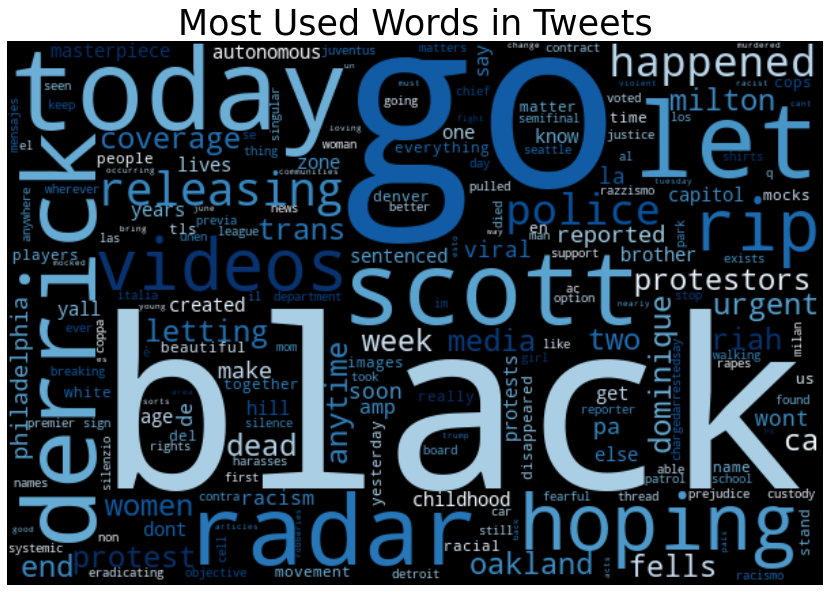

In [43]:
fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud(background_color='black',colormap="Blues", 
                        width=600,height=400).generate_from_frequencies(word_title_cloud)

ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Words in Tweets',fontsize=35)

<font size="+1" color="green"><b>Observation:</b></font><br>

* **Black,derrick scott(The victim),police,today** are the most used words in black lives matter tweets

<font size="+2" color="indigo"><b>More to Come...</b></font><br>

<font size="+2" color="blue"><b>Findings</b></font><br>

* Police killing people have never looked down over years.
* White and Black race people are the most affected.
* Youngsters to Adults around age of 20-40 are being the most victims.
* California,Texas and Florida have recorded the most number of deaths.
* Black race people are widely killed especially on Eastern part of US too.
* 66% of non fleeing people were demised.

*More to come...*

<font size="+2" color="blue"><b>End Note</b></font><br>

We have observed the hard times of migrant people in US.These things need to be controlled by law and government.There is no use of being human without humanity.So let us bring peace and give care to all race people.<font color="green"><i><b> All Lives Matter...</b></i></font>

**If you like my plots and findings,please apprecaiate me with an <font size=+1 color="red">upvote</font>👍.Happy to know that.**

<font size="+2" color="chocolate"><b>My Other Kernels</b></font><br>

Click on the buttons to watch out kernels

<a href="https://www.kaggle.com/raenish/kaggle-notebooks-stats-eda" class="btn btn-primary" style="color:white;">Kaggle Notebooks</a>

<a href="https://www.kaggle.com/raenish/kaggle-users-competitions-eda" class="btn btn-primary" style="color:white;">Kaggle Users & Competitions</a>

<a href="https://www.kaggle.com/raenish/covid19-tweets-interactive-eda" class="btn btn-primary" style="color:white;">COVID19 Tweets</a>

<a href="https://www.kaggle.com/raenish/self-evaluation-kaggle-profiler" class="btn btn-primary" style="color:white;">Kaggle Profiler</a>

<a href="https://www.kaggle.com/raenish/cheatsheet-100-plotly-part-1-basic" class="btn btn-primary" style="color:white;">100+ Plotly Basic</a>

<a href="https://www.kaggle.com/raenish/cheatsheet-100-plotly-part-2-advanced" class="btn btn-primary" style="color:white;">100+ Plotly Advanced</a>

<a href="https://www.kaggle.com/raenish/become-grandmaster/" class="btn btn-primary" style="color:white;">Become Grandmaster</a>

<a href="https://www.kaggle.com/raenish/cheatsheet-date-helpers/" class="btn btn-primary" style="color:white;">Cheatsheet Date Helpers</a>

<a href="https://www.kaggle.com/raenish/cheatsheet-text-helper-functions/" class="btn btn-primary" style="color:white;">Cheatsheet Text Helpers</a>

<a href="https://www.kaggle.com/raenish/tweet-sentiment-insight-eda/" class="btn btn-primary" style="color:white;">Tweet Sentiment Analysis</a>

![](https://cdn.abcotvs.com/dip/images/2439450_092117-wabc-international-day-of-peace-img.jpg)

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>